# Test Functions
In this notebook, we will examine the benchmark test functions, describe their characteristics, and visualize them. To facilitate the visualizations, we will first import the necessary packages and define a `plot_3d` function, which will allow us to plot the test functions of a class containing these functions.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.function import Function

def plot_3d(evaluation_function, params=(-5, 5), resolution=30):
    x = np.linspace(*params, resolution)
    y = np.linspace(*params, resolution)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)

    for i in range(resolution):
        for j in range(resolution):
            Z[i, j] = evaluation_function(np.array([X[i, j], Y[i, j]]))
            
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='plasma', edgecolor='none', alpha=0.9)
    ax.set_title(f"{str.capitalize(evaluation_function.__name__)} function")
    plt.show()


## Sphere function

The **Sphere function** is one of the simplest benchmark functions used in optimization. It is defined as:

$f(x) = \sum_{i=1}^{n} x_i^2$


- **Global minimum:** $x = 0$, where $f(x) = 0$.  
- **Characteristics:** Continuous, convex, unimodal, and smooth. It is often used to test basic optimization algorithms because the landscape is simple and symmetric.

```python
@staticmethod
def sphere(params: np.ndarray) -> float:
    return float(np.sum(params**2))
```

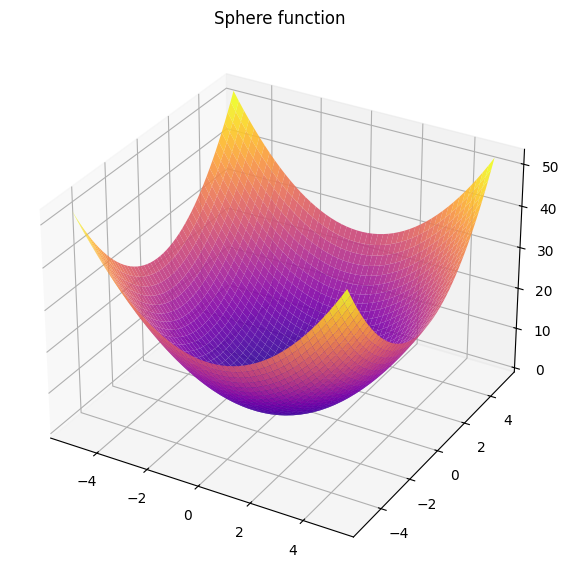

In [2]:
plot_3d(Function.sphere, params=(-5.12, 5.12), resolution=50)

### Modified Sphere Function

The **Modified Sphere function** introduces a few changes for experimentation:

Dimension-specific: 
- Defined for 6-dimensional input vectors only.
- Scaling: Each component is scaled by $2^i$, where $i$ is the index of the variable (from 1 to 6).
- Normalization: The final value is normalized using $(total - 1745) / 899$.
- Error handling: Raises an error if the input vector does not have exactly 6 elements.

It is defined as:

$f(x) = \frac{1}{899}(\sum_{i=1}^{6} x_i^2 2^i - 1745)$


```python
@staticmethod
def sphere_modified(params: np.ndarray) -> float:
    if len(params) != 6: 
        raise ValueError("Input must be a vector of length 6")

    i = np.arange(1, 7)
    total = np.sum(params**2 * 2**i)

    return (total - 1745) / 899
```

### Differences Between the Two Functions:
| Aspect         | Sphere Function         | Modified Sphere Function                                      |
| -------------- | ----------------------- | ------------------------------------------------------------- |
| Dimensionality | Any $n$                 | Fixed at 6                                                    |
| Scaling        | None                    | Scaled by $2^i$                                               |
| Normalization  | None                    | Normalized to a specific range                                |
| Complexity     | Simple, smooth          | Slightly more complex landscape                               |
| Use case       | Basic optimization test | Testing algorithms with scaling and normalization constraints |

The modified version is often used to introduce asymmetry and scaling effects, making the optimization slightly more challenging compared to the original Sphere function.

## Ackley function

The **Ackley function** is a widely used benchmark function in optimization, known for its **many local minima** which make it challenging for optimization algorithms. It is defined as:

$f(x) = -a \exp\Big(-b \sqrt{\frac{1}{n} \sum_{i=1}^{n} x_i^2}\Big) - \exp\Big(\frac{1}{n} \sum_{i=1}^{n} \cos(c x_i)\Big) + a + e$

- **Global minimum:** $x = 0$, where $f(x) = 0$.  
- **Parameters:**
  - $a$ (default 20)
  - $b$ (default 0.2)
  - $c$ (default $2\pi$)  
- **Characteristics:** Continuous, non-convex, multimodal, with a nearly flat outer region and a steep central hole. This landscape tests an algorithm’s ability to escape local minima.

```python
@staticmethod
def ackley(params: np.ndarray, a=20, b=0.2, c=2*np.pi) -> float:
    n = len(params)
    sum1 = np.sum(params**2)
    sum2 = np.sum(np.cos(c * params))
    
    term1 = -a * np.exp(-b * np.sqrt(sum1 / n))
    term2 = -np.exp(sum2 / n)
    
    return term1 + term2 + a + np.e
```

**Usage**: The Ackley function is commonly used to evaluate global optimization algorithms because its numerous local minima make convergence to the global minimum challenging.

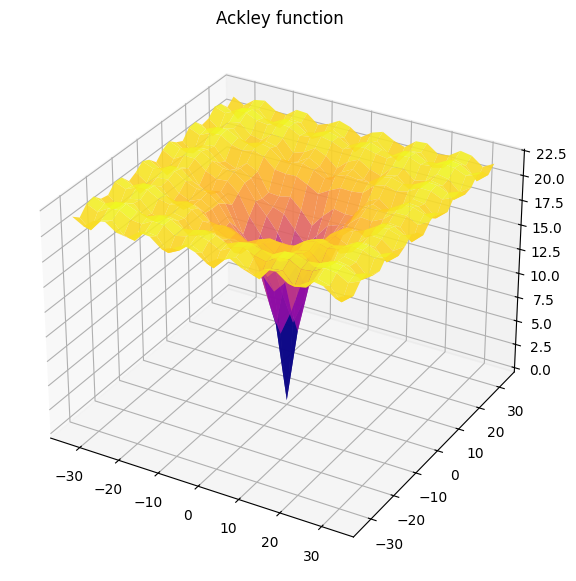

In [3]:
plot_3d(Function.ackley, params=(-32.768, 32.768), resolution=25)

## Rastrigin function

The **Rastrigin function** is a popular benchmark function in optimization, known for its **highly multimodal landscape** with many local minima. It is often used to test global optimization algorithms because its numerous local minima can trap algorithms that rely on local gradient information.

It is defined as:

$f(x) = 10 n + \sum_{i=1}^{n} \left( x_i^2 - 10 \cos(2 \pi x_i) \right)$

- **Global minimum:** $x = 0$, where $f(x) = 0$.  
- **Characteristics:** Continuous, separable, multimodal, periodic. The function’s landscape has a large number of regularly spaced local minima.  
- **Parameters:** $n$ is the dimension of the input vector $x$.  

```python
@staticmethod
def rastrigin(params: np.ndarray) -> float:
    n = len(params)
    total = np.sum(params**2 - 10 * np.cos(2 * np.pi * params))
    return 10 * n + total
```

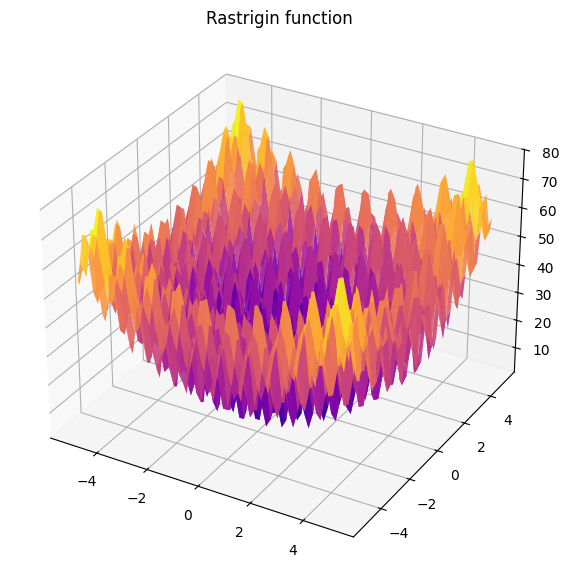

In [4]:
plot_3d(Function.rastrigin, params=(-5.12, 5.12), resolution=60)

## Rosenbrock function

The **Rosenbrock function**, also known as the **banana function**, is a classic benchmark function for optimization algorithms. Its curved, narrow valley makes it **difficult for algorithms that rely on gradient information** to find the global minimum quickly.

It is defined as:

$f(x) = \sum_{i=1}^{n-1} \Big[ 100 (x_{i+1} - x_i^2)^2 + (x_i - 1)^2 \Big]$

- **Global minimum:** $x = [1, 1, \dots, 1]$, where $f(x) = 0$.  
- **Characteristics:** Continuous, non-convex, unimodal, smooth valley. The minimum lies inside a long, narrow, parabolic-shaped valley.  
- **Usage:** Often used to test **convergence speed** of optimization algorithms, especially in higher dimensions.

```python
@staticmethod
def rosenbrock(params: np.ndarray) -> float:
    first = params[:-1]
    second = params[1:]
    total = np.sum(100 * (second - first**2)**2 + (first - 1)**2)
    return total
```

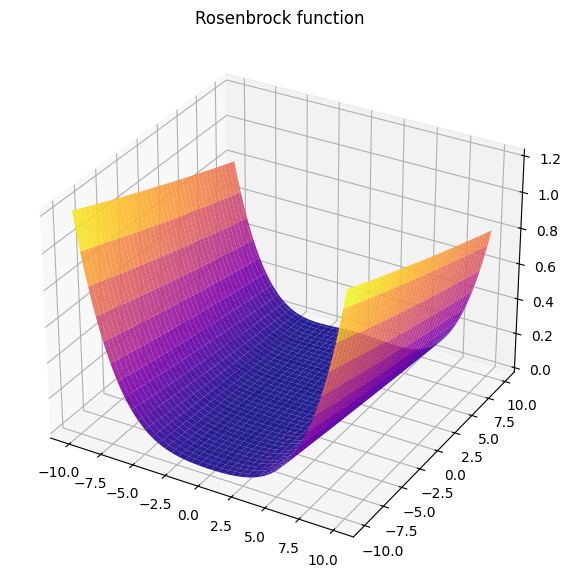

In [5]:
plot_3d(Function.rosenbrock, params=(-10, 10), resolution=80)

### Modified Rosenbrock Function

The **Modified Rosenbrock function** introduces scaling and normalization to make the optimization landscape slightly different:
- Scaling: Input vector scaled using $15 * params - 5$.
- Dimensional reduction: Uses only the first 4 elements for the computation.
- Normalization: Output is normalized using $(total - 3.827e5) / 3.755e5$.

It is defined as:
$
f(x) = \frac{1}{3.755 \times 10^{5}} 
\left[
\sum_{i=1}^{3} \Big(100(\bar{x}_{i+1} - \bar{x}_i^{2})^{2} + (1 - \bar{x}_i)^{2}\Big) - 3.827 \times 10^{5}
\right] \, m
$

where $\bar{x}_i = 15x_i - 5, \quad \text{for all } i = 1,2,3,4$


```python
@staticmethod
def rosenbrock_modified(params: np.ndarray) -> float:
    scaled = 15 * params - 5
    first = scaled[0:3]
    second = scaled[1:4]
    total = np.sum(100 * (second - first**2)**2 + (1 - first)**2)
    return (total - 3.827e5) / 3.755e5

```

## Griewank function
The **Griewank function** is a common benchmark function in optimization, designed to test an algorithm’s ability to handle **nonlinear, multimodal landscapes**. It is defined as:  

$f(x) = \frac{1}{4000}\sum_{i=1}^{n} x_i^2 - \prod_{i=1}^{n}\cos\left(\frac{x_i}{\sqrt{i}}\right) + 1$

- **Global minimum:** $x = 0$, where $f(x) = 0$.  
- **Characteristics:** Continuous, multimodal, scalable to any dimension.  
  - The **sum term** introduces a parabolic bowl-like shape.  
  - The **product of cosines** introduces oscillations, creating **many regularly spaced local minima**.  
  - The global minimum remains easy to locate in theory but difficult in practice due to the rugged landscape.  

```python
@staticmethod
def griewank(params: np.ndarray) -> float:
    n = len(params)
    indices = np.arange(1, n + 1)
    
    term1 = np.sum(params**2 / 4000)
    term2 = np.prod(np.cos(params / np.sqrt(indices)))

    return term1 - term2 + 1
```

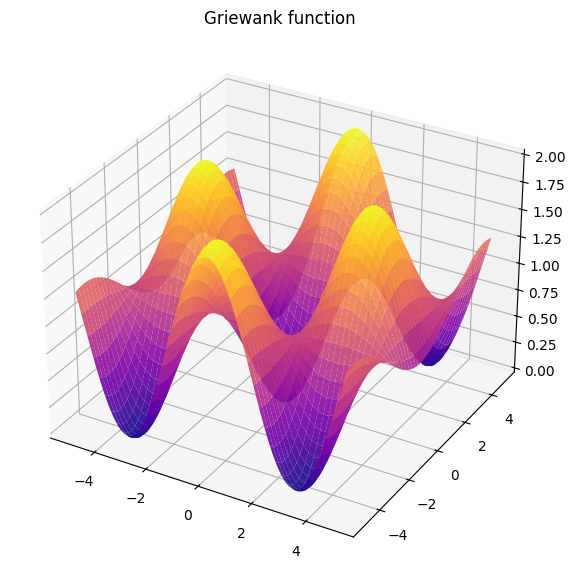

In [6]:
plot_3d(Function.griewank, params=(-5, 5), resolution=100)

**Usage:** The Griewank function is widely used for testing global optimization algorithms, especially evolutionary algorithms and swarm intelligence, due to its large number of evenly distributed local minima that challenge convergence.

## Schwefel function

The **Schwefel function** is a widely used benchmark in optimization, notable for its **complex landscape** with many local minima. It is defined as:  

$f(x) = 418.9829n - \sum_{i=1}^{n} x_i \sin\left(\sqrt{|x_i|}\right)$

- **Global minimum:** $x_i = 420.9687$, for all $i$, where $f(x) \approx 0$.  
- **Characteristics:**  
  - Continuous, non-convex, and multimodal.  
  - The function’s **global minimum lies far from the origin**, unlike many other benchmark functions.  
  - The **oscillatory sine component** creates numerous local minima, making optimization algorithms prone to getting trapped.  
  - Particularly challenging because the search domain is large and deceptive.  

```python
@staticmethod
def schwefel(params: np.ndarray) -> float:
    n = len(params)
    term = np.sum(params * np.sin(np.sqrt(np.abs(params))))
    
    return 418.9829 * n - term
```

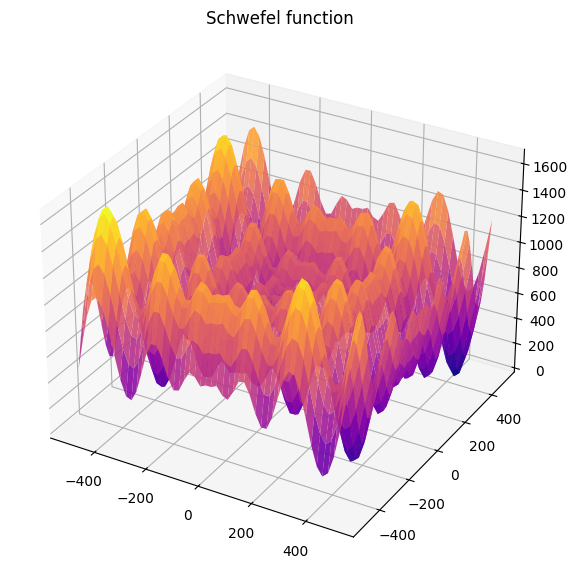

In [7]:
plot_3d(Function.schwefel, params=(-500, 500), resolution=50)

## Lévy function  

The **Lévy function** is a benchmark function used in optimization, known for its **complex, multimodal landscape** with many local minima. It is especially challenging because of its **oscillatory terms** and strong interactions between dimensions.  

The general form is defined as:  
$w_i = 1 + \frac{x_i - 1}{4}$

$f(x) = \sin^2(\pi w_1) + \sum_{i=1}^{n-1} (w_i - 1)^2 \left[1 + 10 \sin^2(\pi w_{i+1})\right] + (w_n - 1)^2 \left[1 + \sin^2(2 \pi w_n)\right]$

- **Global minimum:** $x = (1, 1, \dots, 1)$, where $f(x) = 0$.  
- **Characteristics:**  
  - Continuous, non-convex, and multimodal.  
  - Designed to challenge algorithms with its **many local minima**.  
  - The oscillatory sine components ensure that optimization algorithms must balance **exploration and exploitation** to succeed.  

```python
@staticmethod
def levy(params: np.ndarray) -> float:
    w = 1 + (params - 1) / 4
    first = w[:-1]
    second = w[1:]

    term1 = np.sin(np.pi * w[0])**2
    term2 = np.sum((first - 1)**2 * (1 + 10 * np.sin(np.pi * second)**2))
    term3 = (w[-1] - 1)**2 * (1 + np.sin(2 * np.pi * w[-1])**2)

    return term1 + term2 + term3
```


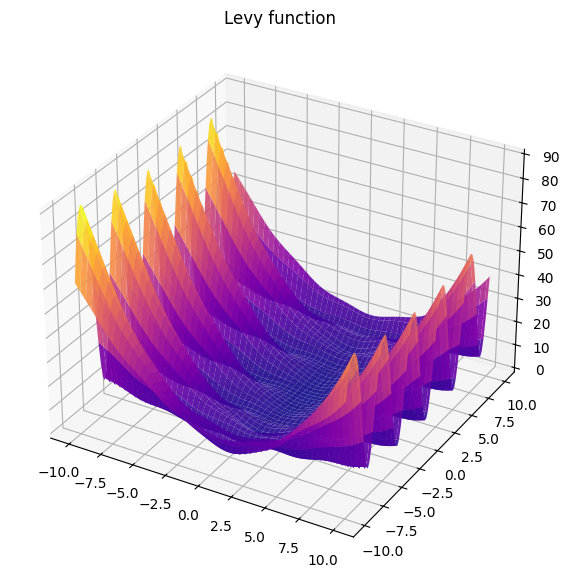

In [8]:
plot_3d(Function.levy, params=(-10, 10), resolution=100)

### Lévy function N.13  

The **Lévy N.13 function** is a 2-dimensional special case of the Lévy function. It is defined as:  

$f(x, y) = \sin^2(3\pi x) + (x-1)^2 \left[1 + \sin^2(3\pi y)\right] + (y-1)^2 \left[1 + \sin^2(2\pi y)\right]$

- **Global minimum:** $(x, y) = (1, 1)$, where $f(x, y) = 0$.  
- **Characteristics:**  
  - Multimodal with a highly **rugged 2D surface**.  
  - Serves as a compact test problem while still preserving the complexity of the general Lévy function.  

```python
@staticmethod
def levy_13(params: np.ndarray) -> float:
    term1 = np.sin(3 * np.pi * params[0])**2
    term2 = (params[0] - 1)**2 * (1 + np.sin(3 * np.pi * params[1])**2)
    term3 = (params[1] - 1)**2 * (1 + np.sin(2 * np.pi * params[1])**2)

    return term1 + term2 + term3
```

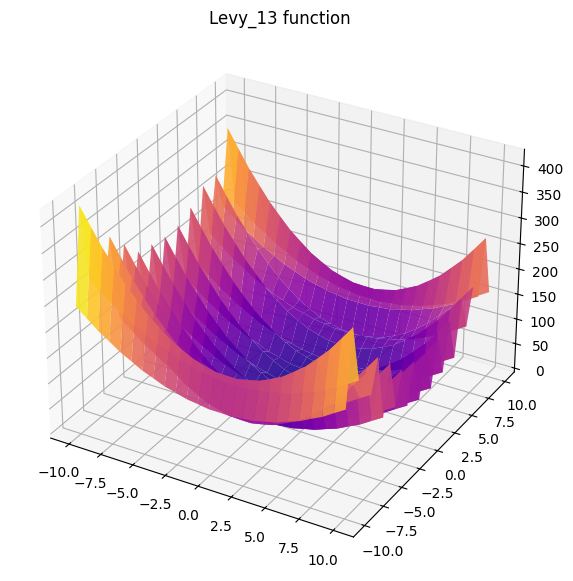

In [9]:
plot_3d(Function.levy_13, params=(-10, 10), resolution=25)

## Michalewicz function
### Michalewicz function  

The **Michalewicz function** is a well-known benchmark function in optimization, characterized by its **steep valleys** and **numerous local minima**, which make it difficult for algorithms to find the global optimum.  

It is defined as:  

$f(x) = - \sum_{i=1}^{n} \sin(x_i) \left[\sin\left(\frac{i x_i^2}{\pi}\right)\right]^{2m}$

- **Global minimum:**  
  - The location of the global minimum depends on the **dimension** $n$ and the **shape parameter** $m$.  
  - For example, in 2D with $m = 10$, the global minimum is approximately $f(x) \approx -1.8013$.  
- **Parameters:**  
  - $m$ (default $10$) — controls the steepness and number of local minima.  
- **Characteristics:**  
  - Continuous, non-convex, multimodal.  
  - The number of local minima increases with both **dimension** and **m**, making it highly deceptive.  
  - Used to test an algorithm’s ability to avoid premature convergence.  

```python
@staticmethod
def michalewicz(params: np.ndarray, constant=10) -> float:
    n = len(params)
    indices = np.arange(1, n + 1)
    term = np.sum(np.sin(params) * (np.sin(indices * params**2 / np.pi))**(2*constant))
    return -term
```

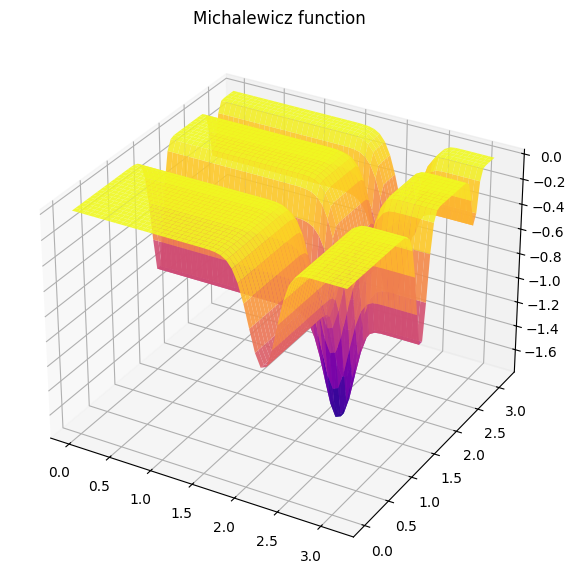

In [10]:
plot_3d(Function.michalewicz, params=(0, np.pi), resolution=50)


## Zakharov function

The **Zakharov function** is a standard test problem in optimization, combining a simple quadratic term with higher-order interactions. Its landscape is **smooth and convex-like**, but the added squared and quartic terms introduce nonlinearity.  

It is defined as:  

$f(x) = \sum_{i=1}^{n} x_i^2 + \left(\sum_{i=1}^{n} 0.5 i x_i \right)^2 + \left(\sum_{i=1}^{n} 0.5 i x_i \right)^4$

- **Global minimum:** $x = (0, 0, \dots, 0)$, where $f(x) = 0$.  
- **Characteristics:**  
  - Continuous, differentiable, and unimodal.  
  - Despite its nonlinearity, it has only **one global minimum** and no local minima.  
  - Useful for testing optimization algorithms on **non-separable functions** with smooth landscapes.  

```python
@staticmethod
def zakharov(params: np.ndarray) -> float:
    n = len(params)
    indices = np.arange(1, n + 1)

    term1 = np.sum(params**2)
    term2 = np.sum(0.5 * indices * params)

    return term1 + term2**2 + term2**4
```

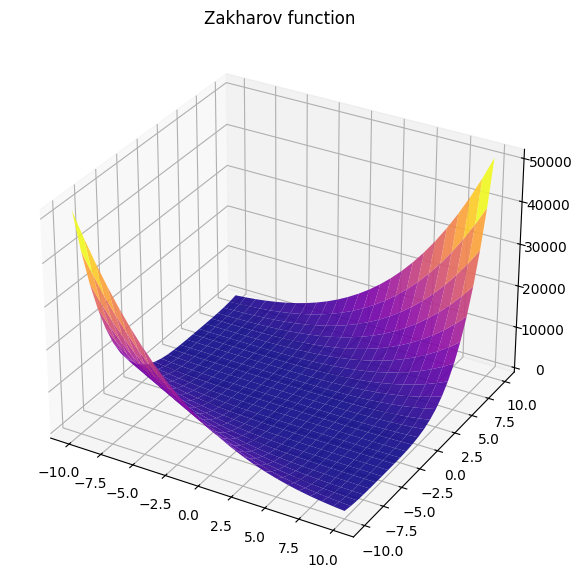

In [11]:
plot_3d(Function.zakharov, params=(-10, 10), resolution=25)